<a href="https://colab.research.google.com/github/niksisons/image_processing/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%964_%D0%9E%D1%81%D0%BD%D0%BE%D0%B2%D0%BD%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_OpenCV_%D0%A7%D0%B0%D1%81%D1%82%D1%8C_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №4. Основные методы OpenCV (Часть №2). Базовые операции**

## **Базовый уровень**

---

### **Задание №1. Напишите функцию, которая принимает на вход строку с ссылкой на изображение из сети Интернет и возвращает открытое изображение в OpenCV**

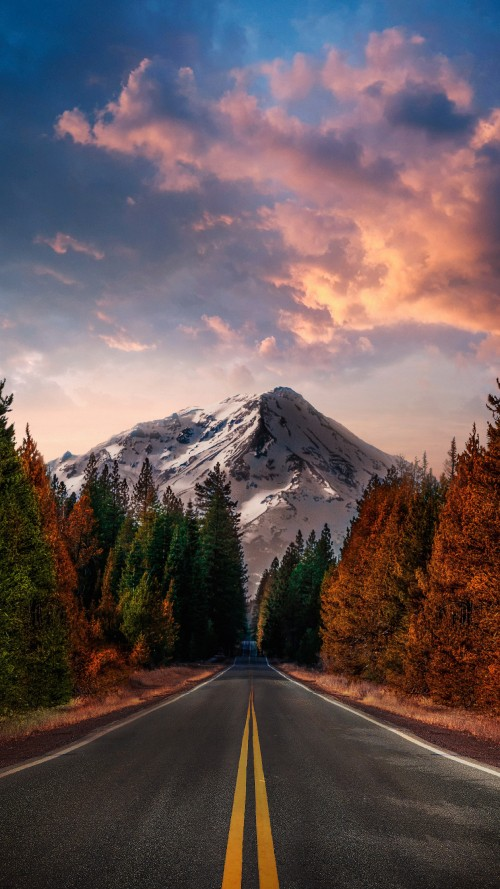

In [14]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from urllib.request import urlopen


def load_image_from_url(url):
  req = urlopen(url)
  image = np.asarray(bytearray(req.read()), dtype=np.uint8)
  image = cv2.imdecode(image, -1)
  return image


image_url = "https://img3.akspic.ru/previews/1/8/7/5/7/175781/175781-andzhunabity-andzhunadip-soundcloud-oblako-rastenie-500x.jpg"
cv2_imshow(load_image_from_url(image_url))

---

### **Задание 2: Создание цветных градиентов**




**Задание:**

1. Создайте цветное изображение размером 512x512 пикселей.
2. Реализуйте вертикальный градиент от зеленого к синему цвету:
   - Сверху изображение должно быть полностью зеленым.
   - Снизу изображение должно быть насыщенного синего цвета.
   - Градиент должен плавно изменяться по вертикали.
3. Отобразите полученное изображение, убедившись в корректности градиента.

**Подсказки:**

- Используйте функции библиотеки NumPy для создания и заполнения массива изображения.
- Помните, что в OpenCV цветовое пространство BGR (Blue, Green, Red).



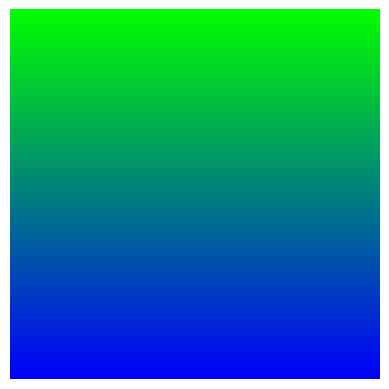

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_gradient_image(height, width):
    image = np.zeros((height, width, 3), dtype=np.uint8)

    for y in range(height):
        green_value = int(255 * (1 - y / height))
        blue_value = int(255 * (y / height))

        image[y, :] = [blue_value, green_value, 0]

    return image

gradient_image = create_gradient_image(512, 512)

plt.imshow(cv2.cvtColor(gradient_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


---

### **Задание №3. Рисование сложных фигур**



**Задание:**

1. Создайте черное изображение размером 800x600 пикселей.
2. Нарисуйте на изображении следующие фигуры:
   - Красный круг с центром в точке (400, 300) и радиусом 100 пикселей.
   - Синий квадрат со стороной 50 пикселей, вписанный в круг из предыдущего пункта.
   - Зеленый треугольник, вершины которого совпадают с тремя вершинами квадрата.
3. Добавьте текст "OpenCV" белого цвета внутри квадрата, используя шрифт, поддерживающий кириллицу.
4. Отобразите полученное изображение.

**Подсказки:**

- Используйте функции `cv.circle()`, `cv.rectangle()`, `cv.polylines()` для рисования фигур.
- Для задания координат треугольника вам потребуется вычислить позиции трех вершин квадрата.
- Функция `cv.putText()` поможет добавить текст на изображение.

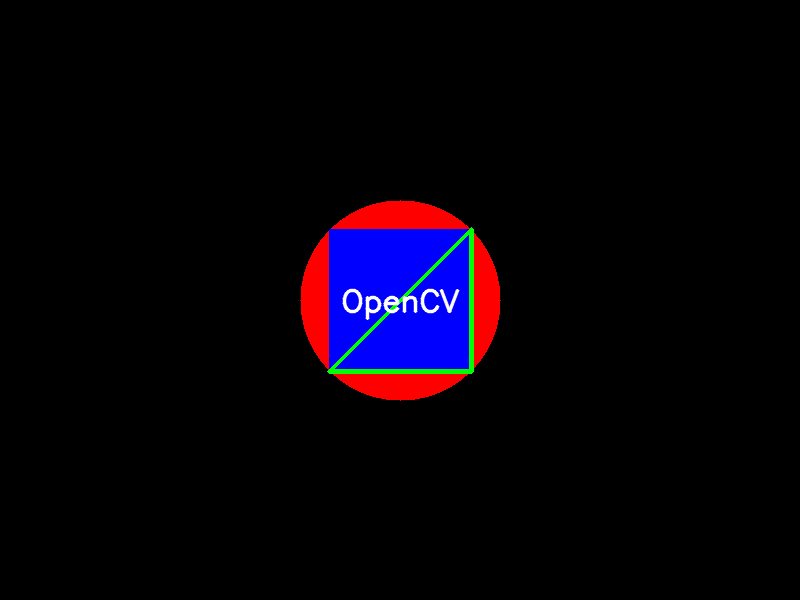

In [16]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = np.zeros((600, 800, 3), dtype=np.uint8)

way = False
center = (400, 300)

if way:
  radius = 141
  half_rectangle_side = 100
else:
  radius = 100
  half_rectangle_side = 71

cv2.circle(image, center, radius, (0, 0, 255), -1)

top_left_corner = (center[0] - half_rectangle_side, center[1] - half_rectangle_side)
bottom_right_corner = (center[0] + half_rectangle_side, center[1] + half_rectangle_side)
cv2.rectangle(image, top_left_corner, bottom_right_corner, (255, 0, 0), -1)

triangle_points = np.array([[top_left_corner[0], bottom_right_corner[1]],
                            [bottom_right_corner[0], bottom_right_corner[1]],
                            [center[0] + half_rectangle_side, top_left_corner[1]]],
                           np.int32)
cv2.polylines(image, [triangle_points], isClosed=True, color=(0, 255, 0), thickness=3)

font = cv2.FONT_HERSHEY_SIMPLEX
text = "OpenCV"
text_size = cv2.getTextSize(text, font, 1, 2)[0]
text_x = center[0] - text_size[0] // 2
text_y = center[1] + text_size[1] // 2
cv2.putText(image, text, (text_x, text_y), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

cv2_imshow(image)

---

### **Задание №4. Интерактивное выделение и преобразование области интереса**



**Задание:**

Реализуйте функцию, которая принимает на вход открытое изображение, а затем:
1. Позволяет пользователю указать область интереса (ROI) путем ввода координат верхнего левого и нижнего правого углов.
2. Вырезает указанную область из изображения.
3. Отражает эту область по вертикали и горизонтали.
4. Вставляет преобразованную область обратно в исходное изображение на исходное место.
5. Возвращает конечное изображение.

*Отобразите рядом изображение до и после обработки*

**Подсказки:**

- Используйте функции ввода `input()` для получения координат от пользователя.
- Для отражения воспользуйтесь функцией `cv.flip()` или реализуйте свой алгоритм с использованием срезов NumPy.




Введите ссылку на изображение: https://i.pinimg.com/236x/ee/8c/9f/ee8c9f9e9a91ae6f361d388c58da22bd.jpg
Введите координаты для верхнего левого угла:
Введите координаты угла (X Y), не превышающие размеры изображения 236x305: 50 100
Введите координаты для нижнего правого угла:
Введите координаты угла (X Y), не превышающие размеры изображения 236x305: 200 300
Изображение после обработки:


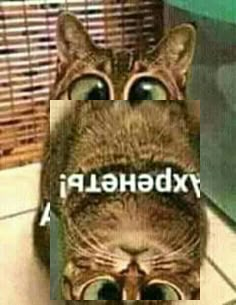

In [22]:
import cv2
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


def get_coordinates(width, height):
    try:
        coords = input(f"Введите координаты угла (X Y), не превышающие размеры изображения {width}x{height}: ")
        x, y = map(int, coords.split())

        if 0 <= x < width and 0 <= y < height:
            return x, y
        else:
            print(f"Ошибка: координаты должны быть в пределах изображения {width}x{height}.")
    except ValueError:
        print("Ошибка: введите 2 целых числа через пробел.")


def show_image_with_axes(image):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Изображение с координатными осями")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()


def load_image_from_url(url):
    try:
        req = urlopen(url)
        image = np.asarray(bytearray(req.read()), dtype=np.uint8)
        image = cv2.imdecode(image, -1)
        return image
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        return None


def interactive_roi_processing():
    url = input("Введите ссылку на изображение: ")
    image = load_image_from_url(url)

    if image is None:
        print("Не удалось загрузить изображение.")
        return

    # show_image_with_axes(image)

    height, width = image.shape[:2]
    print("Введите координаты для верхнего левого угла:")
    x1, y1 = get_coordinates(width, height)

    print("Введите координаты для нижнего правого угла:")
    x2, y2 = get_coordinates(width, height)

    if x1 >= x2 or y1 >= y2:
        print("Ошибка: верхний левый угол должен быть меньше по обеим осям, чем нижний правый угол.")
        return

    roi = image[y1:y2, x1:x2]

    flipped_roi = cv2.flip(roi, -1)

    image[y1:y2, x1:x2] = flipped_roi

    print("Изображение после обработки:")
    cv2_imshow(image)


interactive_roi_processing()

---

### **Задание 5: Реализация функции коррекции яркости и контраста**



**Задание:**

1. Напишите собственную функцию для изменения яркости и контраста изображения без использования `cv.convertScaleAbs()`.
2. Функция должна принимать параметры `alpha` (коэффициент контраста) и `beta` (сдвиг яркости).
3. Проверьте работу функции на цветном изображении с различными значениями `alpha` и `beta`.
4. Сравните результат вашей функции с результатом `cv.convertScaleAbs()`.

**Подсказки:**

- Убедитесь, что значения пикселей после преобразования остаются в диапазоне [0, 255].
- Для безопасного преобразования используйте функцию `np.clip()`.



Введите ссылку на изображение: https://i.pinimg.com/236x/ee/8c/9f/ee8c9f9e9a91ae6f361d388c58da22bd.jpg
Введите коэффициент контраста (alpha): 2.0
Введите сдвиг яркости (beta): 50
Оригинальное изображение:


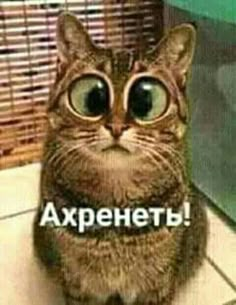

Изображение с яркостью и контрастом alpha=2.0, beta=50 (собственная функция):


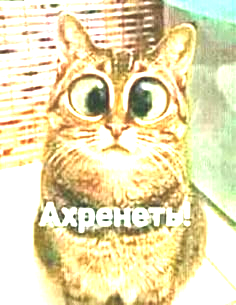

Изображение с яркостью и контрастом alpha=2.0, beta=50 (cv.convertScaleAbs()):


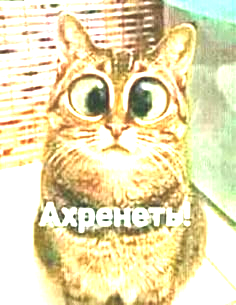

In [24]:
import cv2
import numpy as np
from urllib.request import urlopen
from google.colab.patches import cv2_imshow

def adjust_brightness_and_contrast(url, alpha, beta):
    try:
        req = urlopen(url)
        image = np.asarray(bytearray(req.read()), dtype=np.uint8)
        image = cv2.imdecode(image, -1)

        new_image = alpha * image + beta

        new_image = np.clip(new_image, 0, 255).astype(np.uint8)

        return image, new_image
    except Exception as e:
        print(f"Ошибка при загрузке изображения: {e}")
        return None, None

url = input("Введите ссылку на изображение: ")
alpha = float(input("Введите коэффициент контраста (alpha): "))
beta = int(input("Введите сдвиг яркости (beta): "))

original_image, adjusted_image = adjust_brightness_and_contrast(url, alpha, beta)

if original_image is not None and adjusted_image is not None:

    cv_adjusted_image = cv2.convertScaleAbs(original_image, alpha=alpha, beta=beta)

    print("Оригинальное изображение:")
    cv2_imshow(original_image)

    print(f"Изображение с яркостью и контрастом alpha={alpha}, beta={beta} (собственная функция):")
    cv2_imshow(adjusted_image)

    print(f"Изображение с яркостью и контрастом alpha={alpha}, beta={beta} (cv.convertScaleAbs()):")
    cv2_imshow(cv_adjusted_image)


---

## **Повышенный уровень**

### **Комплексное задание №1: Анализ качества интерполяции изображений**



**Цель задания:**

- Закрепить понимание различных методов интерполяции и их влияния на качество изображений.
- Научиться применять метрики качества (например, MSE) для количественной оценки результатов обработки изображений.
- Практиковаться в написании эффективного и корректного кода для задач компьютерного зрения.

**Описание задания:**

- В данном задании вам предстоит исследовать влияние различных методов интерполяции на качество увеличенных изображений. Вы должны реализовать функцию для вычисления среднеквадратичной ошибки (MSE) между оригинальным изображением и его обработанной версией после уменьшения и последующего увеличения с использованием различных методов интерполяции.

**Требования к выполнению задания:**

1. **Реализация функции для вычисления MSE:**

   - Напишите функцию, которая принимает на вход два изображения одинакового размера и вычисляет среднеквадратичную ошибку (MSE) между ними. Формула для расчета MSE:

   $$
   \text{MSE} = \frac{1}{N} \sum_{i=1}^{N} (I_{\text{original}}(i) - I_{\text{processed}}(i))^2
   $$

   где:
   - $N$ — общее количество пикселей в изображении.
   - $I_{\text{original}}(i)$ и $I_{\text{processed}}(i)$ — значения интенсивности пикселя $i$ в исходном и обработанном изображениях соответственно.

2. **Сравнение методов интерполяции:**

   - Используйте следующие методы интерполяции при изменении размера изображения:
     - **Метод ближайшего соседа (Nearest Neighbor)**
     - **Билинейная интерполяция (Bilinear Interpolation)**
     - **Бикубическая интерполяция (Bicubic Interpolation)**

   - Для каждого метода выполните следующие шаги:
     - **а) Уменьшение изображения:**
       - Уменьшите исходное изображение по каждой оси в 2 и 4 раза (т.е. по площади в 4 и 16 раз соответственно) с использованием выбранного метода интерполяции.
     - **б) Увеличение изображения:**
       - Увеличьте полученное уменьшенное изображение обратно до исходного размера, используя тот же метод интерполяции.
     - **в) Вычисление MSE:**
       - Вычислите MSE между исходным изображением и восстановленным после увеличения.
   
   - Повторите эти шаги для каждого метода интерполяции и каждого коэффициента масштабирования (2 и 4 раза).

3. **Анализ и представление результатов:**

   - Представьте результаты в виде таблицы, где для каждого метода интерполяции и коэффициента масштабирования указано значение MSE.
   - Сравните полученные значения MSE между методами:
     - Какой метод дает наименьшую ошибку при разных коэффициентах масштабирования?
     - Как изменение коэффициента масштабирования влияет на качество восстановления изображения для каждого метода?
   - Сделайте выводы о том, какой метод интерполяции предпочтительнее использовать при увеличении изображений и почему.



**Дополнительные указания:**

- **Работа с цветными изображениями:**
  - Если вы работаете с цветными изображениями, вычисляйте MSE для каждого цветового канала (R, G, B) и затем усредняйте, либо преобразуйте изображение в оттенки серого перед обработкой.

- **Визуализация:**
  - Для наглядности вы можете дополнительно визуализировать исходные и восстановленные изображения, а также показать разницу между ними.
  - Используйте библиотеку **matplotlib** для отображения изображений в Colab.




**Пример структуры программы:**

- **Функция для вычисления MSE:**
  ```python
  def calculate_mse(original_image, processed_image):
      # Ваш код для вычисления MSE
  ```
  
- **Основная функция для сравнения методов:**
  ```python
  def compare_interpolation_methods(image_path):
      # Загрузка изображения
      # Применение методов интерполяции с разными коэффициентами масштабирования
      # Вычисление MSE для каждого случая
      # Представление и анализ результатов
  ```
  



In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import pandas as pd

In [26]:
def calculate_mse(original_image, processed_image):
    original_image = original_image.astype(np.float32)
    processed_image = processed_image.astype(np.float32)

    mse = np.mean((original_image - processed_image) ** 2)
    return mse

In [27]:
def resize_image(image, scale_factor, interpolation_method):
    height, width = image.shape[:2]
    reduced_image = cv2.resize(
        image,
        (width // scale_factor, height // scale_factor),
        interpolation=interpolation_method)
    restored_image = cv2.resize(
        reduced_image,
        (width, height),
        interpolation=interpolation_method)
    return restored_image

In [28]:
def compare_interpolation_methods(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("неверный путь")

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    interpolation_methods = {
        "Ближайший сосед": cv2.INTER_NEAREST,
        "Билинейная интерполяция": cv2.INTER_LINEAR,
        "Бикубическая интерполяция": cv2.INTER_CUBIC
    }
    scale_factors = [2, 4]

    results = []

    for method_name, method in interpolation_methods.items():
        for scale in scale_factors:
            restored_image = resize_image(gray_image, scale, method)
            mse = calculate_mse(gray_image, restored_image)
            results.append({"Метод интерполяции": method_name,
                            "Коэффициент масштабирования": f"Уменьшение в {scale} раза",
                            "MSE": mse})

    df_results = pd.DataFrame(results)
    display(df_results)

    for method_name, method in interpolation_methods.items():
        fig, axes = plt.subplots(1, len(scale_factors) + 1, figsize=(15, 5))
        axes[0].imshow(gray_image, cmap='gray')
        axes[0].set_title("Исходное изображение")
        axes[0].axis("off")

        for i, scale in enumerate(scale_factors):
            restored_image = resize_image(gray_image, scale, method)
            mse_value = df_results[
                (df_results["Метод интерполяции"] == method_name) &
                (df_results["Коэффициент масштабирования"] == f"Уменьшение в {scale} раза")
            ]["MSE"].values[0]
            axes[i + 1].imshow(restored_image, cmap='gray')
            axes[i + 1].set_title(f"{method_name}\nМасштаб {scale}x\nMSE: {mse_value:.2f}")
            axes[i + 1].axis("off")

        plt.show()

,Метод интерполяции,Коэффициент масштабирования,MSE
0,Ближайший сосед,Уменьшение в 2 раза,82.516876
1,Ближайший сосед,Уменьшение в 4 раза,173.006927
2,Билинейная интерполяция,Уменьшение в 2 раза,16.047890
3,Билинейная интерполяция,Уменьшение в 4 раза,44.726406
4,Бикубическая интерполяция,Уменьшение в 2 раза,11.443480
5,Бикубическая интерполяция,Уменьшение в 4 раза,47.842072


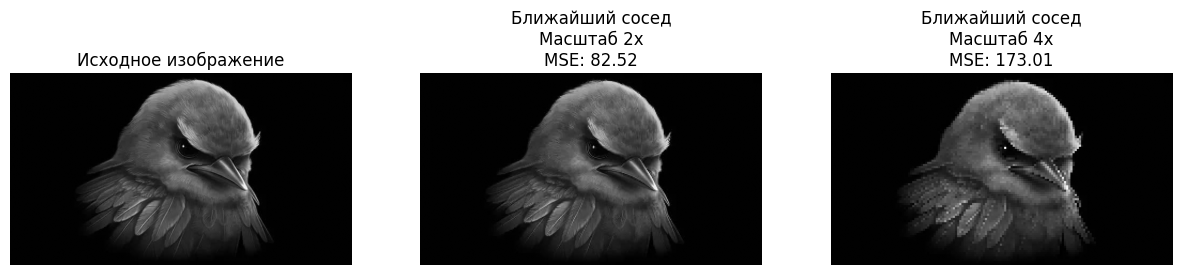

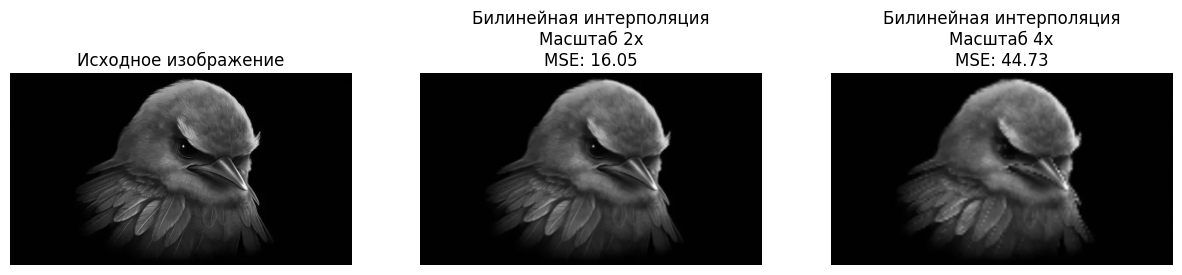

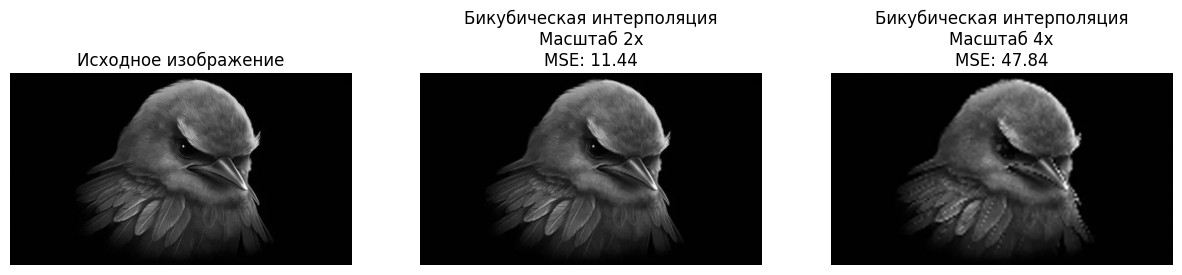

In [30]:
image_path = 'ss.jpg'
compare_interpolation_methods(image_path)

**Ожидаемый результат:**

- Таблица с значениями MSE для каждого метода интерполяции и коэффициента масштабирования.
- Выводы по результатам анализа, например:

| Метод интерполяции    | Коэффициент масштабирования | MSE         |
|-----------------------|-----------------------------|-------------|
| Ближайший сосед       | Уменьшение в 2 раза         | Значение 1  |
| Ближайший сосед       | Уменьшение в 4 раза         | Значение 2  |
| Билинейная интерполяция | Уменьшение в 2 раза       | Значение 3  |
| ...                   | ...                         | ...         |

- Заключение о том, какой метод и при каком масштабировании сохраняет наилучшее качество изображения.

### **Комплексное задание №2: Создание HDR-подобного эффекта на обычном изображении**

#### **Описание задания:**

  - В этом задании вам необходимо разработать программу на Python с использованием библиотеки OpenCV, которая преобразует обычное изображение в изображение с HDR-подобным эффектом. Вы должны реализовать собственный метод объединения изображений с разной экспозицией, используя операции NumPy.


#### **Основные определения:**

1. **Экспозиция** — это количество света, которое попадает на светочувствительный элемент камеры (матрицу или пленку) во время съемки. Экспозиция определяется сочетанием трех параметров:

  - **Выдержка**: время, в течение которого затвор камеры остается открытым, позволяя свету попасть на матрицу.
  - **Диафрагма**: размер отверстия в объективе, через которое проходит свет; измеряется в числах f/стоп.
  - **Чувствительность ISO**: уровень чувствительности матрицы камеры к свету.

  > Правильная установка этих параметров позволяет получить изображение с оптимальной яркостью и контрастностью, отображая детали как в светлых, так и в темных областях.


2. **HDR (High Dynamic Range) изображение** — это изображение с расширенным динамическим диапазоном яркости. Динамический диапазон представляет разницу между самыми темными и самыми светлыми участками изображения. HDR-изображения позволяют отобразить детали во всех областях сцены, даже если контраст между тенями и уровнями светам очень велик.

- HDR-эффект достигается путем:

  - **Объединения нескольких изображений** одной и той же сцены, снятых с разными настройками экспозиции (недоэкспонированное, нормально экспонированное и переэкспонированное). Это позволяет захватить полный диапазон яркостей сцены.
  - **Применения специальных алгоритмов обработки**, которые расширяют динамический диапазон одного изображения, усиливая детали в тенях и светах.

  > Используя HDR, фотографы и специалисты по обработке изображений могут создавать богатые деталями и реалистичные изображения, близкие к тому, как человеческий глаз воспринимает мир.

#### **Цели:**

- Научиться работать с изображениями в OpenCV без использования готовых функций для смешивания изображений.
- Освоить базовые операции обработки изображений: изменение яркости, объединение изображений, повышение контрастности.
- Получить навыки создания эффектов с помощью операций NumPy.


#### **Требования к программе:**

1. **Загрузка изображения:**
   - Программа должна быть реализована в виде функции или набора функций, основная функция получает на вход исходное изображение, открытое заранее в OpenCV и возвращает обработанное изображение.

2. **Создание виртуальных экспозиций:**
   - На основе исходного изображения создать несколько версий изображения с разной экспозицией:
     - **Недоэкспонированное** изображение (темнее исходного).
     - **Правильно экспонированное** изображение (без изменений).
     - **Переэкспонированное** изображение (светлее исходного).
   - Для изменения экспозиции можно использовать простые операции изменения яркости:
     - Уменьшение или увеличение яркости путем умножения пикселей на коэффициент. Оптимальный коэффициент Вы выбираете сами.

3. **Объединение экспозиций:**
   - Используйте операции NumPy для объединения изображений.
   
    Для этого необходимо:
      - Поэлементно сложить изображения с разной экспозицией.
      - Нормализовать итоговое изображение, чтобы значения пикселей находились в диапазоне [0, 255].
      - Преобразовать тип данных изображения для предотвращения переполнения во время вычислений.

4. **Повышение контрастности:**
   - Применить метод выравнивания гистограммы для улучшения контрастности итогового изображения.
   - Для цветных изображений преобразовать их в цветовое пространство LAB и применить выравнивание гистограммы к яркостному каналу.

5. **Отображение результатов:**
   - Отобразить исходное и итоговое изображения рядом с помощью библиотеки `matplotlib`.
   - Убедиться в корректном отображении цветовых пространств при использовании `matplotlib` (преобразовать изображения из BGR в RGB).


#### **Подсказки и рекомендации:**

- **Изменение экспозиции:**
  - Можно использовать `cv.convertScaleAbs()` для корректного изменения яркости и преобразования типов данных.
  - Коэффициенты изменения яркости должны быть выбраны так, чтобы обеспечить заметное отличие между экспозициями.

- **Объединение изображений:**
  - Преобразовать изображения в формат `float32` перед суммированием, чтобы избежать переполнения.
  - После суммирования разделить итоговое изображение на количество объединяемых изображений для нормализации.
  - Использовать функцию `np.clip()` для ограничения значений пикселей в диапазоне [0, 255].
  - Преобразовать итоговое изображение обратно в формат `uint8`.


In [31]:
import cv2
import numpy as np


def create_exposure_images(image,
                           underexpose_factor=0.5,
                           overexpose_factor=1.5):
    underexposed = cv2.convertScaleAbs(image, alpha=underexpose_factor, beta=0)
    normal = image.copy()
    overexposed = cv2.convertScaleAbs(image, alpha=overexpose_factor, beta=0)
    return underexposed, normal, overexposed


def combine_exposures(images):
    images_float = [img.astype(np.float32) for img in images]
    combined_image = sum(images_float) / len(images_float)
    combined_image = np.clip(combined_image, 0, 255).astype(np.uint8)
    return combined_image


def enhance_contrast(image):
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l_channel, a_channel, b_channel = cv2.split(lab_image)
    l_channel = cv2.equalizeHist(l_channel)
    lab_image = cv2.merge((l_channel, a_channel, b_channel))
    enhanced_image = cv2.cvtColor(lab_image, cv2.COLOR_LAB2BGR)
    return enhanced_image


def apply_hdr_effect_to_image(image):
    underexposed, normal, overexposed = create_exposure_images(image)
    combined_image = combine_exposures([underexposed, normal, overexposed])
    hdr_like_image = enhance_contrast(combined_image)
    return hdr_like_image

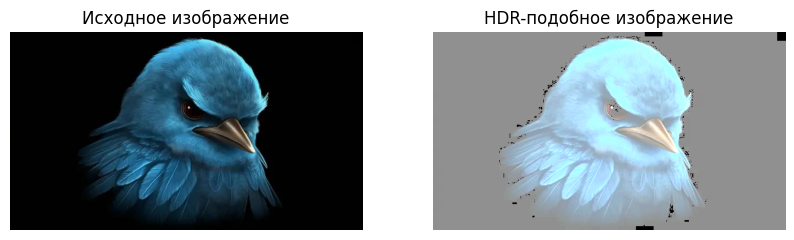

In [32]:
import matplotlib.pyplot as plt


image = cv2.imread("ss.jpg")
if image is None:
    raise ValueError("неверный путь")

hdr_image = apply_hdr_effect_to_image(image)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Исходное изображение")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(hdr_image, cv2.COLOR_BGR2RGB))
plt.title("HDR-подобное изображение")
plt.axis("off")
plt.show()

---

### **Комплексное задание №3: Генерация и модификация растровых изображений с использованием графических шаблонов**

#### Пункт №3.1.

**Создайте полностью черное растровое изображение с размерностью (1920, 1080, 3)**

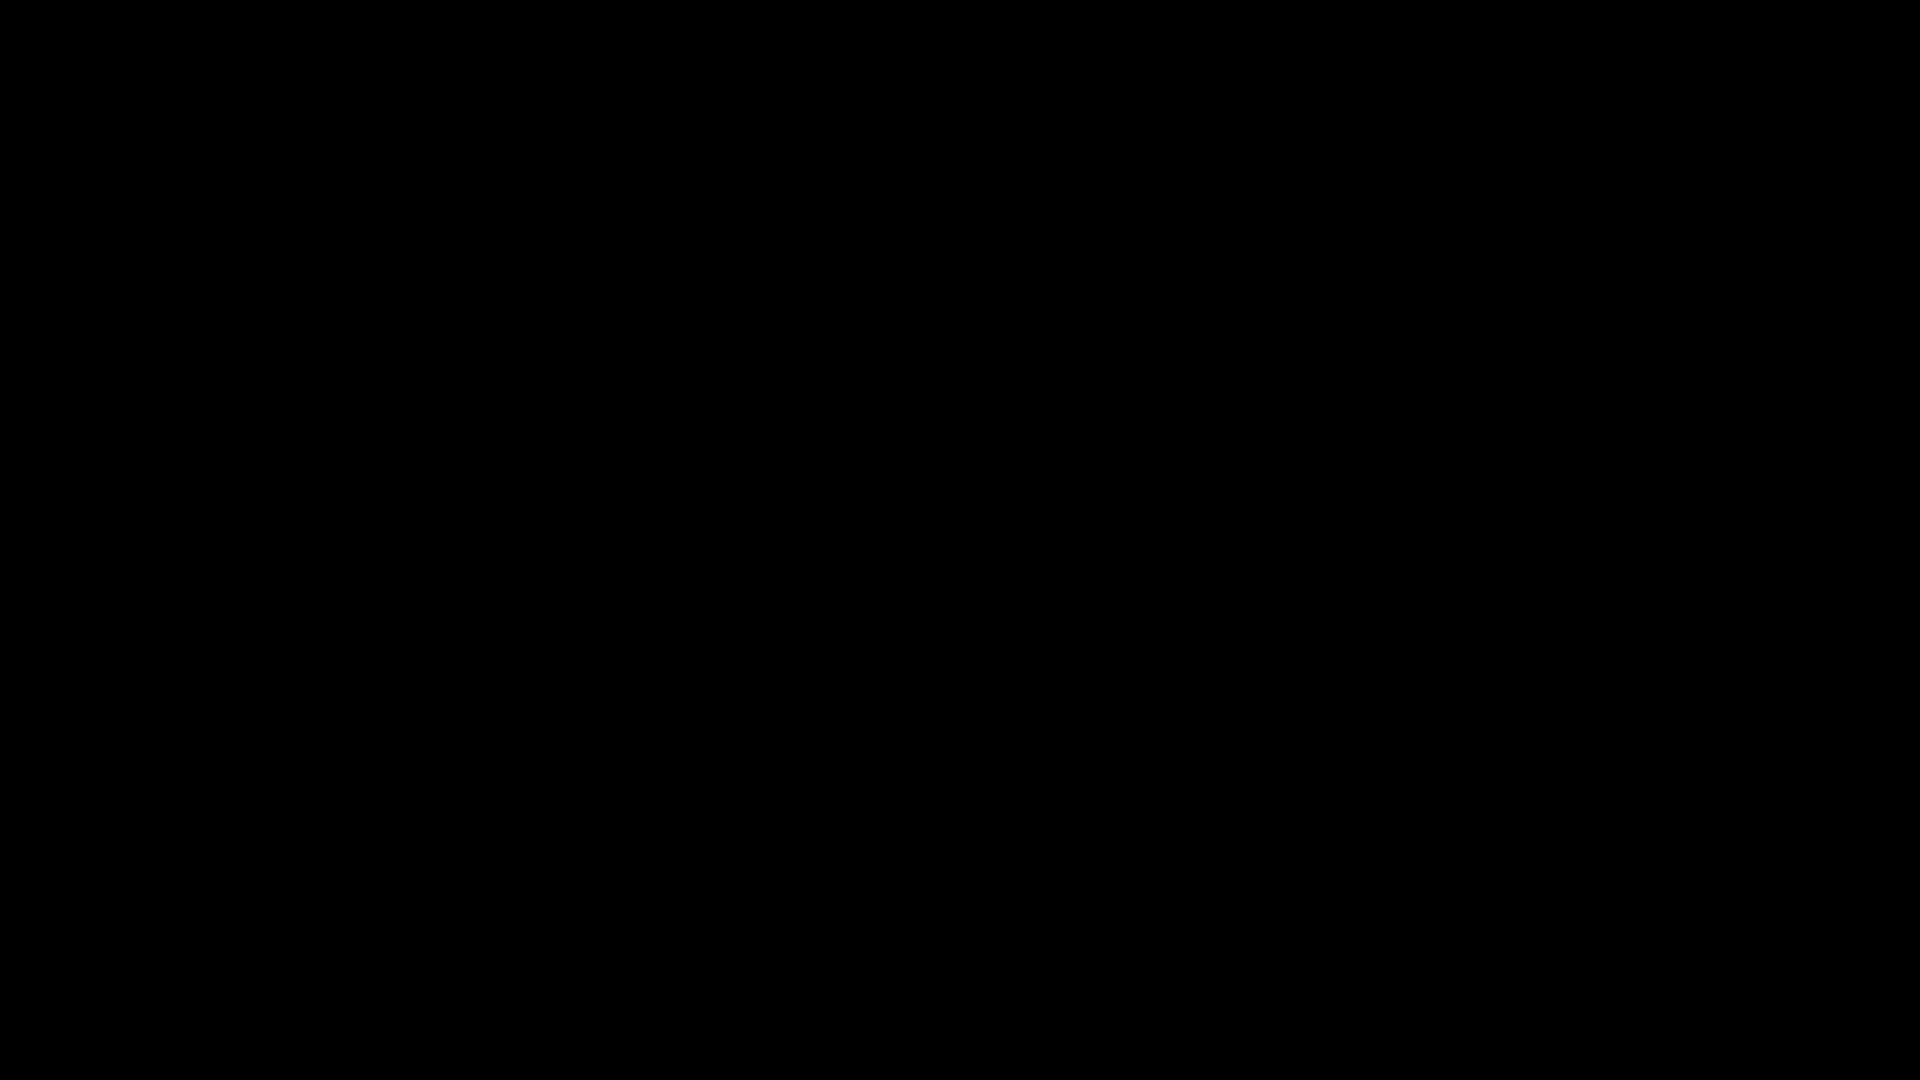

In [34]:
def create_black_image():
  return np.zeros((1080, 1920, 3), dtype=np.uint8)


cv2_imshow(create_black_image())

#### Пункт №3.2.

**Напишите функцию, которая принимает на вход изображение и целое число n. После чего функция возвращает изображение с числом n графических объектов из линий в верхней части (выше половины высоты).**

 Графические объекты находятся в случайных местах и выглядят следующим образом:

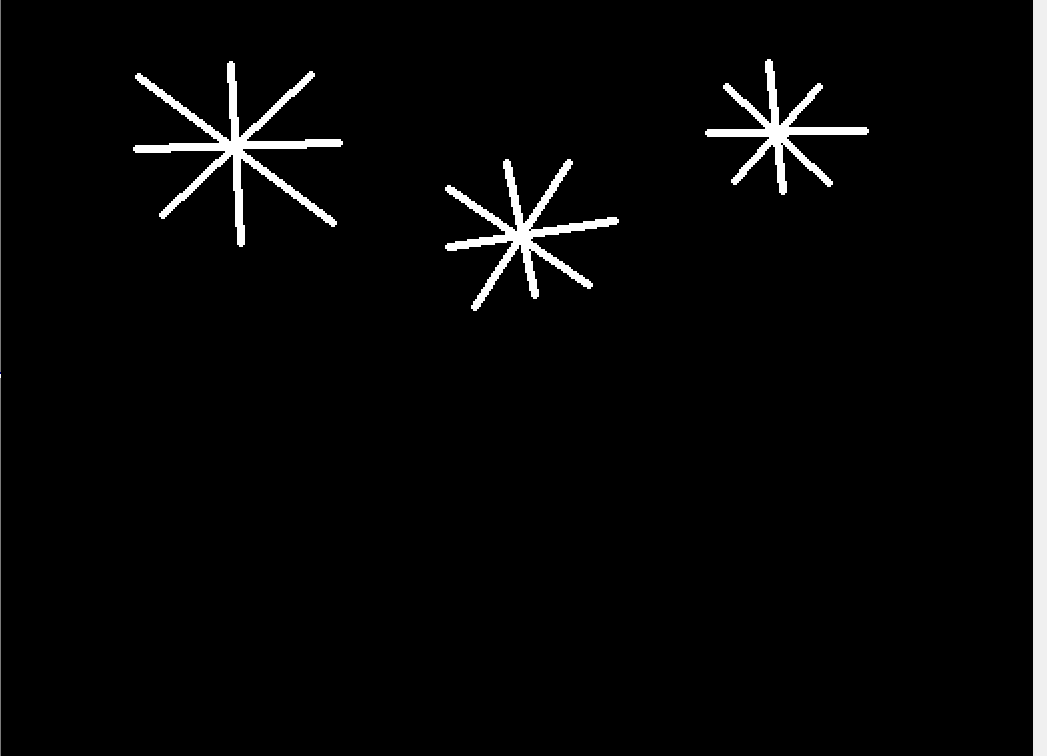

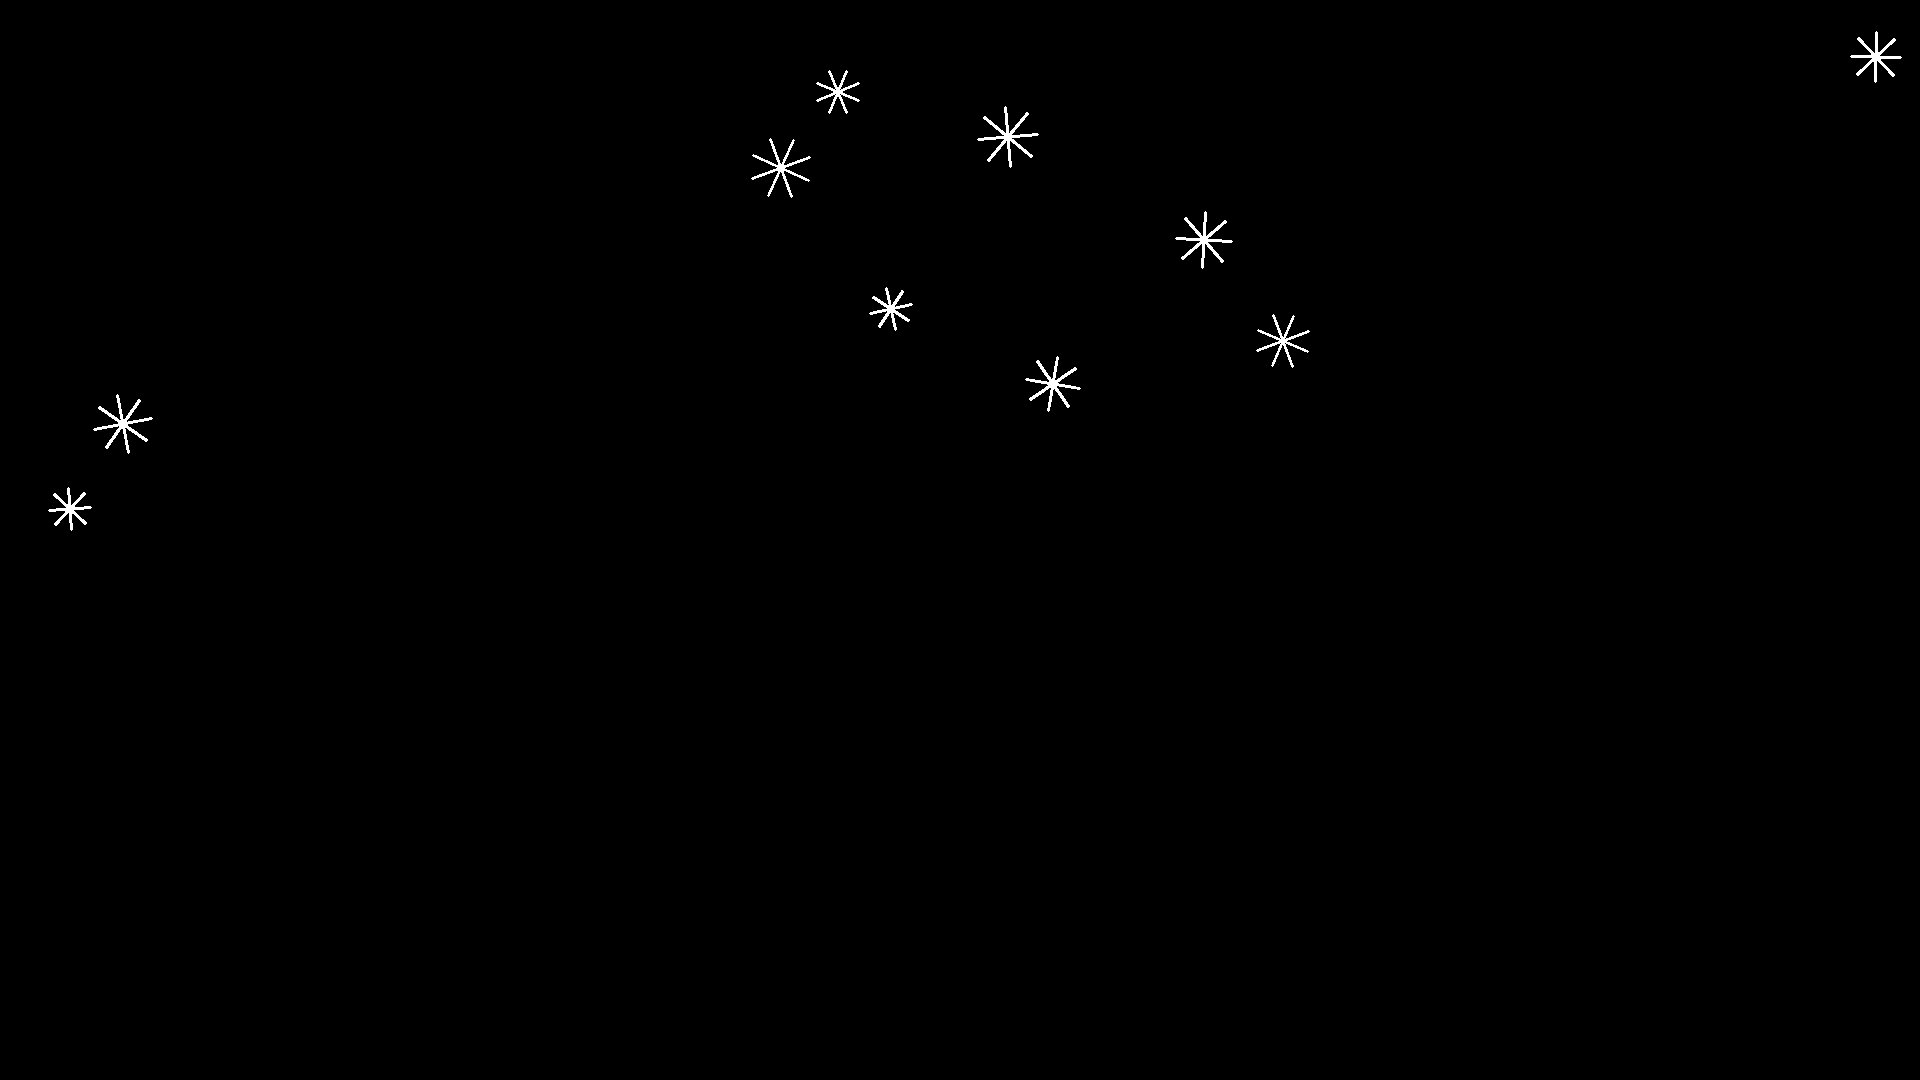

In [36]:
import cv2
import numpy as np
import random
import math

def draw_snowflakes(image, n):
    height, width, _ = image.shape
    upper_half = height // 2

    snowflake_positions = set()

    while len(snowflake_positions) < n:
        center_x = random.randint(30, width - 30)
        center_y = random.randint(30, upper_half - 30)

        # Проверка, не пересекается ли снежинка с другими
        if all(abs(center_x - x) > 30 and abs(center_y - y) > 30 for x, y in snowflake_positions):
            snowflake_positions.add((center_x, center_y))

    for center_x, center_y in snowflake_positions:
        radius = random.randint(20, 30)


        rotation_angle = random.uniform(0, 360)

        base_angles = [0, 90, 45, 135]

        for base_angle in base_angles:
            angle = base_angle + rotation_angle
            angle_rad = math.radians(angle)

            end_x = int(center_x + radius * math.cos(angle_rad))
            end_y = int(center_y + radius * math.sin(angle_rad))

            opposite_x = int(center_x - radius * math.cos(angle_rad))
            opposite_y = int(center_y - radius * math.sin(angle_rad))

            cv2.line(image, (end_x, end_y), (opposite_x, opposite_y), (255, 255, 255), 2)

    return image

n_snowflakes = 10
result_image = draw_snowflakes(create_black_image(), n_snowflakes)

cv2_imshow(result_image)

#### Пункт №3.3

**Напишите функцию, которая принимает на вход изображение и целое число n. После чего функция возвращает изображение с числом n графических объектов из кругов в нижней части.**

Графические объекты находятся в случайных местах и выглядят следующим образом:

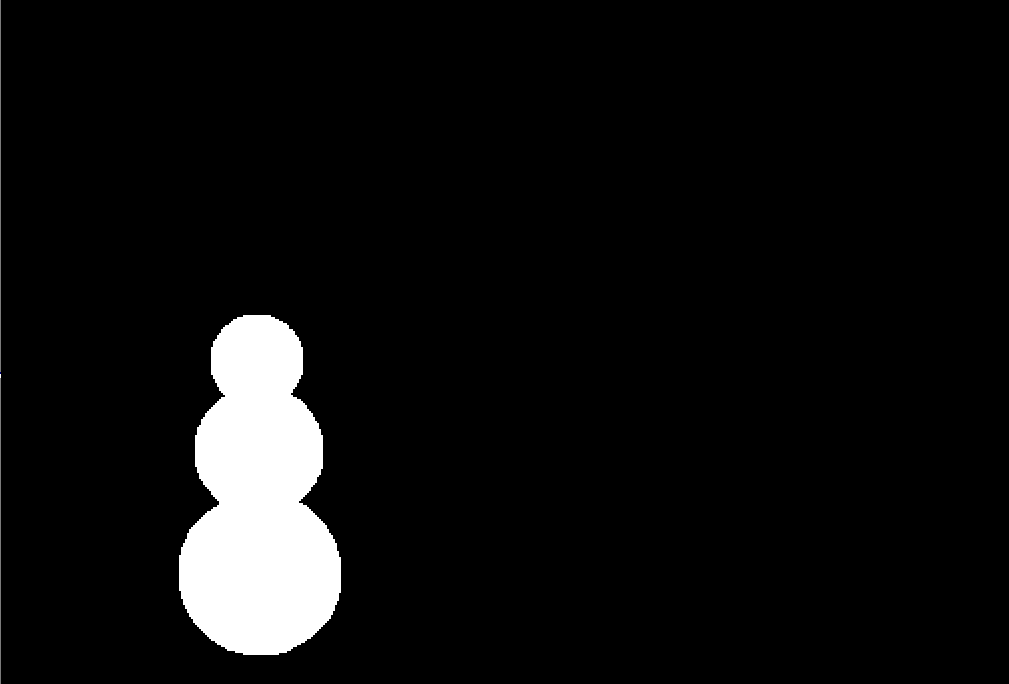

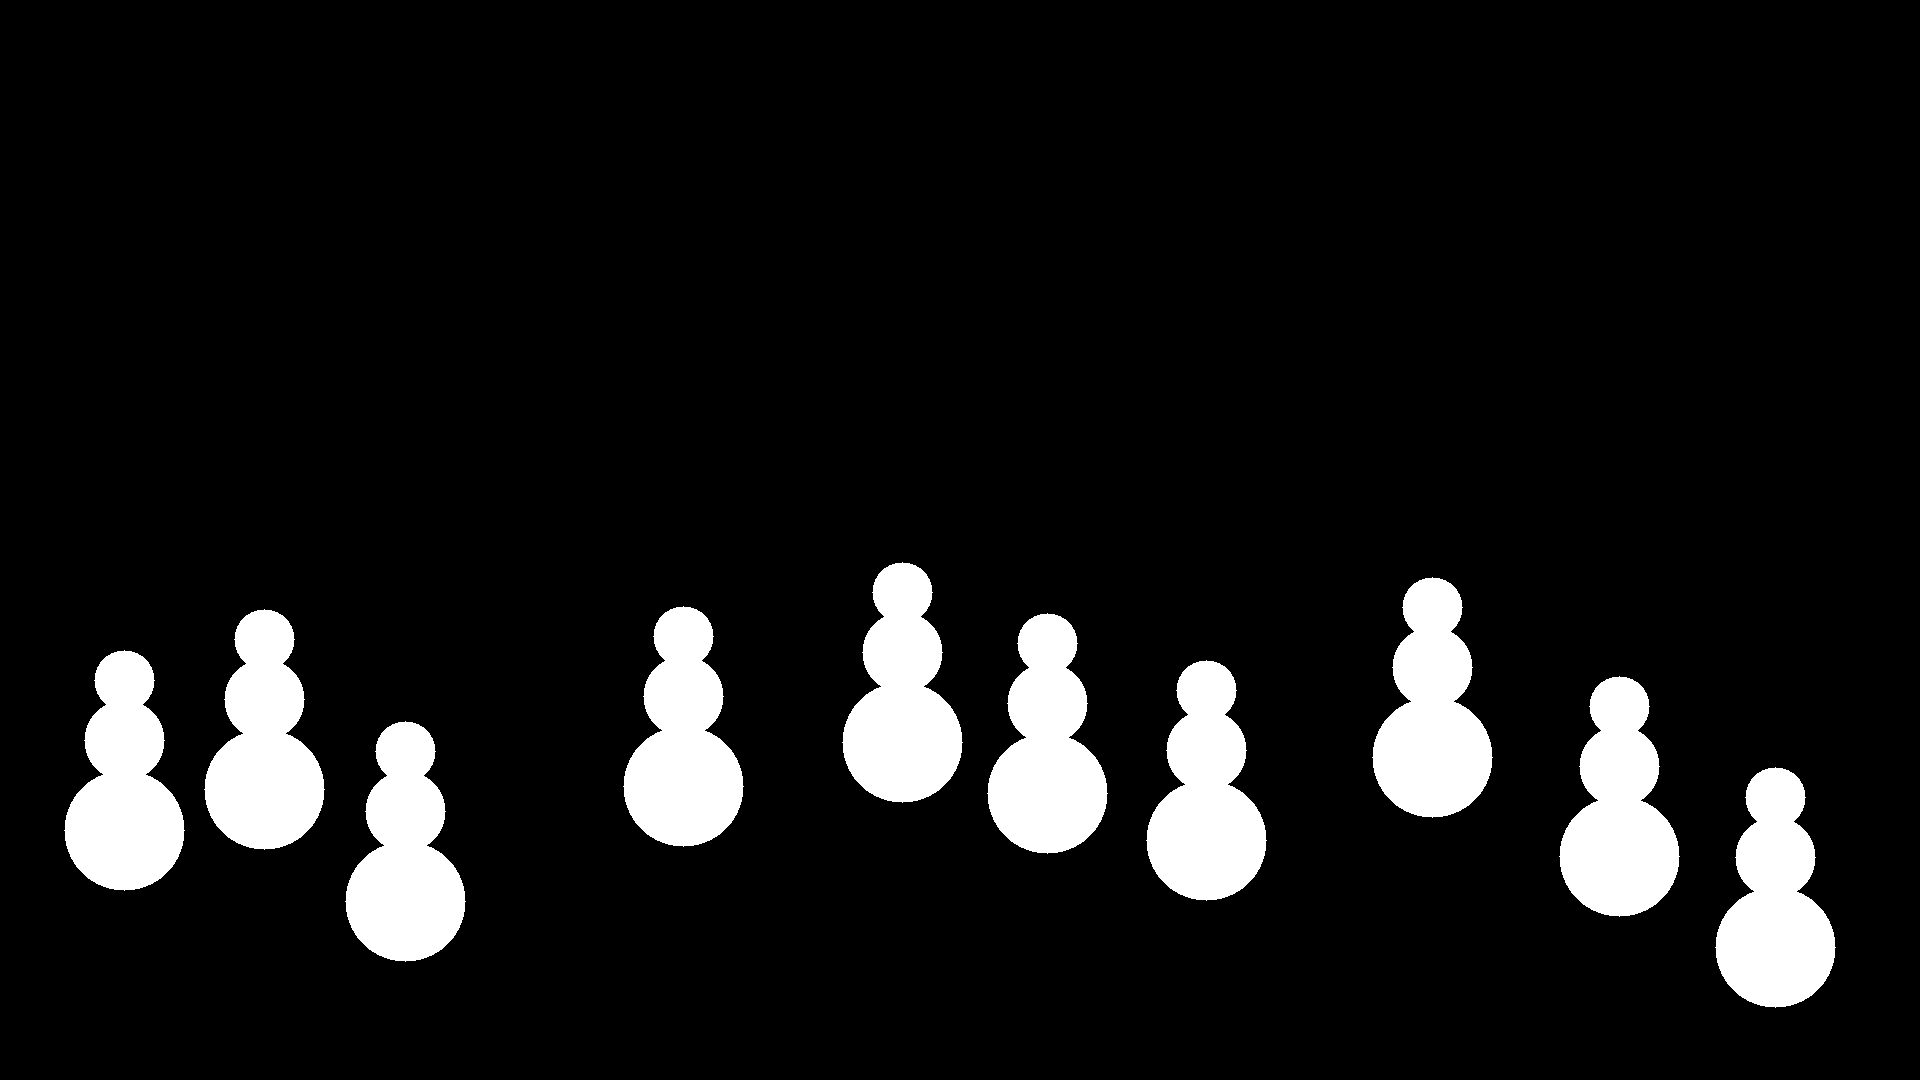

In [38]:
def draw_snowmen(image, n, size_factor=1):
    height, width, _ = image.shape

    head_radius = int(15 * size_factor)
    middle_radius = int(20 * size_factor)
    base_radius = int(30 * size_factor)

    max_y = height - 2*(head_radius + middle_radius + base_radius) - 5
    min_y = height // 2 + head_radius

    min_x = 50
    max_x = width - 50

    padding = 10*size_factor

    snowman_positions = []
    k = 0

    for _ in range(n):
        placed = False

        while not placed:
            base_center_x = random.randint(min_x, max_x)
            base_center_y = random.randint(min_y, max_y)

            collision = False
            for (x, y) in snowman_positions:

                occupied_head = (x - head_radius - padding, y - head_radius - padding,
                                 x + head_radius + padding, y + head_radius + padding)
                occupied_middle = (x - middle_radius - padding, y + 30 * size_factor - middle_radius - padding,
                                   x + middle_radius + padding, y + 30 * size_factor + middle_radius + padding)
                occupied_base = (x - base_radius - padding, y + 30 * size_factor + 45 * size_factor - base_radius - padding,
                                 x + base_radius + padding, y + 30 * size_factor + 45 * size_factor + base_radius + padding)

                # Проверяем пересечение с кругами текущего снеговика
                if (base_center_x - head_radius < occupied_base[2] and
                    base_center_x + head_radius > occupied_base[0] and
                    base_center_y - head_radius < occupied_base[3] and
                    base_center_y + head_radius > occupied_base[1]) or \
                   (base_center_x - middle_radius < occupied_middle[2] and
                    base_center_x + middle_radius > occupied_middle[0] and
                    base_center_y + 30 * size_factor - middle_radius < occupied_middle[3] and
                    base_center_y + 30 * size_factor + middle_radius > occupied_middle[1]) or \
                   (base_center_x - base_radius < occupied_base[2] and
                    base_center_x + base_radius > occupied_base[0] and
                    base_center_y + 30 * size_factor + 45 * size_factor - base_radius < occupied_base[3] and
                    base_center_y + 30 * size_factor + 45 * size_factor + base_radius > occupied_base[1]):
                    collision = True
                    break

            if not collision:
                snowman_positions.append((base_center_x, base_center_y))
                placed = True
        k += 1
        # print(f"отрисовано {k} из {n}")
    for base_center_x, base_center_y in snowman_positions:
        cv2.circle(image, (base_center_x, base_center_y), head_radius, (255, 255, 255), -1)  # Голова
        cv2.circle(image, (base_center_x, base_center_y + 30 * size_factor), middle_radius, (255, 255, 255), -1)  # Средний круг
        cv2.circle(image, (base_center_x, base_center_y + 30 * size_factor + 45 * size_factor), base_radius, (255, 255, 255), -1)  # Основной круг

    return image

n_snowmen = 10
result_image = draw_snowmen(create_black_image(), n_snowmen, size_factor=2)

cv2_imshow(result_image)

#### Пункт №3.4.

**Напишите функцию, которая принимает на вход изображение и целое число n. После чего функция возвращает изображение с числом n графических объектов из полигонов в нижней части.**

Графические объекты находятся в случайных местах и выглядят следующим образом:

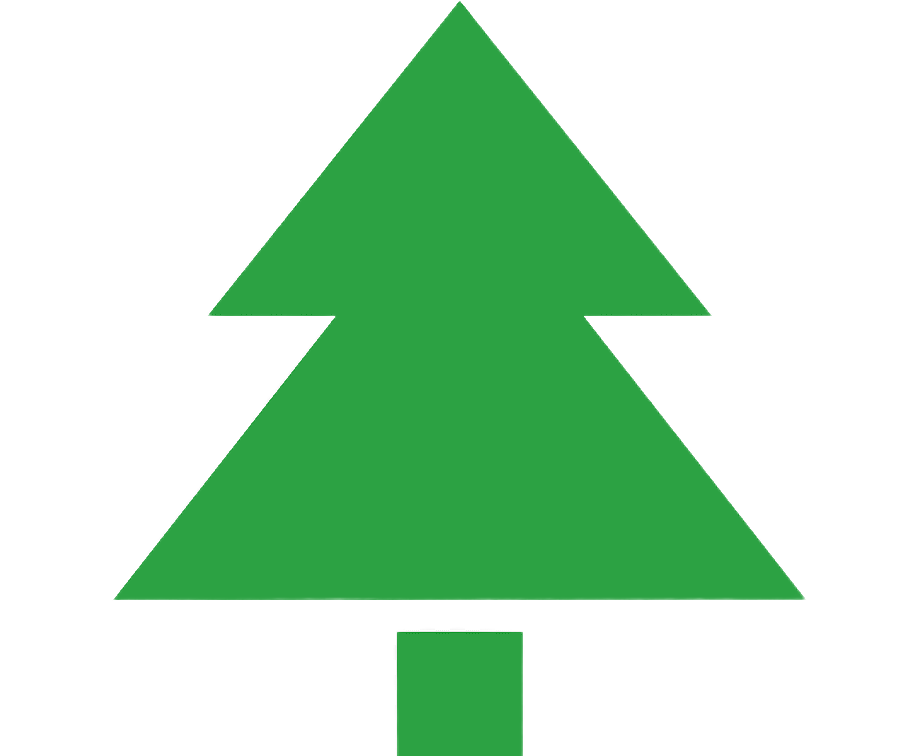

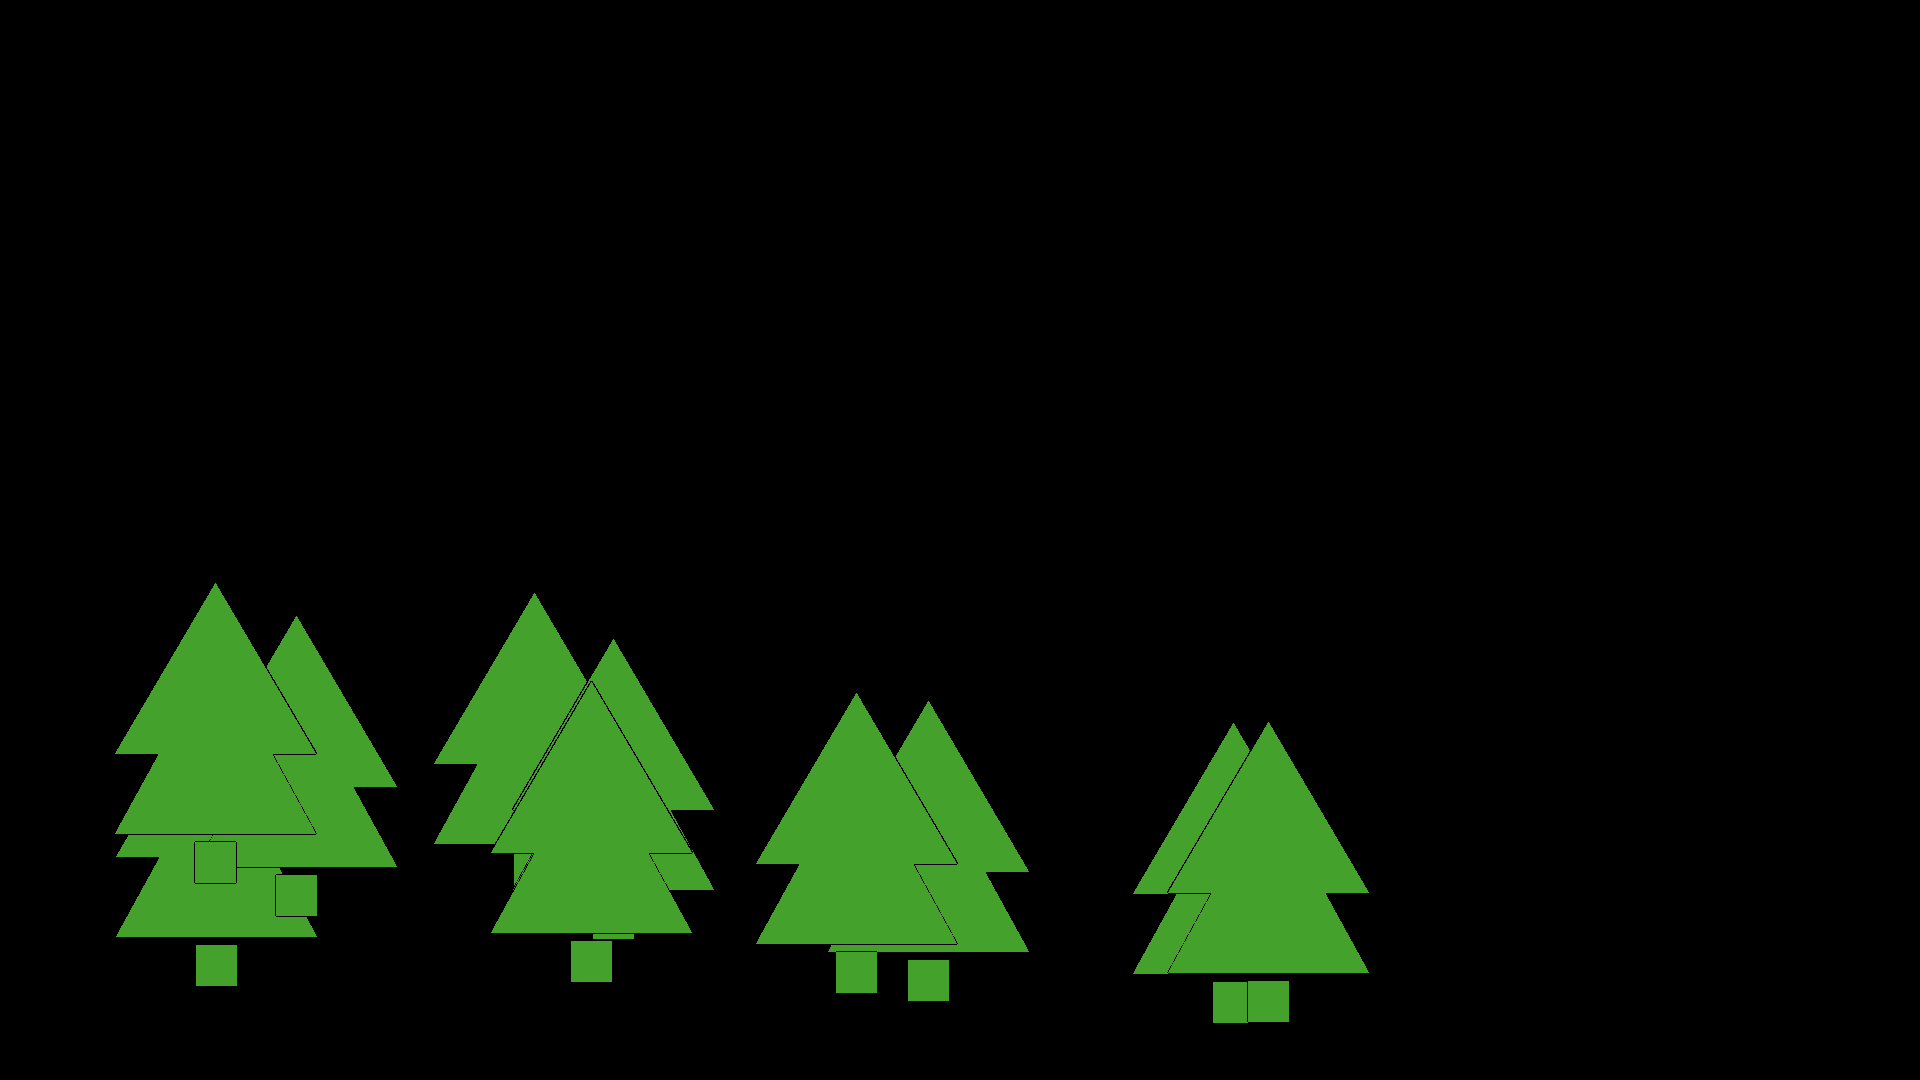

In [48]:
def draw_trees(image, n, size_factor=1):
    height, width, _ = image.shape

    trunk_height = int(20 * size_factor)
    trunk_width = int(20 * size_factor)
    triangle_side_length = int(100 * size_factor)

    min_x = 50
    max_x = width - 50
    min_y = height // 2

    for _ in range(n):
        trunk_center_x = random.randint(min_x, max_x)
        trunk_bottom_y = random.randint(min_y + trunk_height + int(triangle_side_length * 1.5), height - 50)


        trunk_top_y = trunk_bottom_y - trunk_height

        offset = trunk_height // 4.25

        lower_triangle = np.array([
            (trunk_center_x - triangle_side_length // 2, trunk_top_y - offset),
            (trunk_center_x + triangle_side_length // 2, trunk_top_y - offset),
            (trunk_center_x, trunk_top_y - triangle_side_length + offset)
        ], dtype=np.int32)

        upper_triangle = np.array([
            (trunk_center_x - triangle_side_length // 2, trunk_top_y - int(triangle_side_length * 0.4) - offset),
            (trunk_center_x + triangle_side_length // 2, trunk_top_y - int(triangle_side_length * 0.4) - offset),
            (trunk_center_x, trunk_top_y - int(triangle_side_length * 1.25) - offset)
        ], dtype=np.int32)

        cv2.polylines(image, [lower_triangle], isClosed=True, color=(0, 0, 0), thickness=2)
        cv2.polylines(image, [upper_triangle], isClosed=True, color=(0, 0, 0), thickness=2)
        cv2.rectangle(image,
                      (trunk_center_x - trunk_width // 2, trunk_top_y),
                      (trunk_center_x + trunk_width // 2, trunk_bottom_y),
                      (0, 0, 0),
                      thickness=2)

        cv2.fillPoly(image, [lower_triangle], (44, 161, 67))
        cv2.fillPoly(image, [upper_triangle], (44, 161, 67))
        cv2.rectangle(image,
                      (trunk_center_x - trunk_width // 2, trunk_top_y),
                      (trunk_center_x + trunk_width // 2, trunk_bottom_y),
                      (44, 161, 67),
                      -1)

    return image

n_trees = 10
result_image = draw_trees(create_black_image(), n_trees, size_factor=2)
cv2_imshow(result_image)

#### Пункт №3.5

**Напишите функцию, которая принимает на вход изображение и строку. После чего функция возвращает изображение с наложенным на него текстом из строки.**

**Текст должен располагаться в нижней четверти изображения и выровнен по середине**

770 551


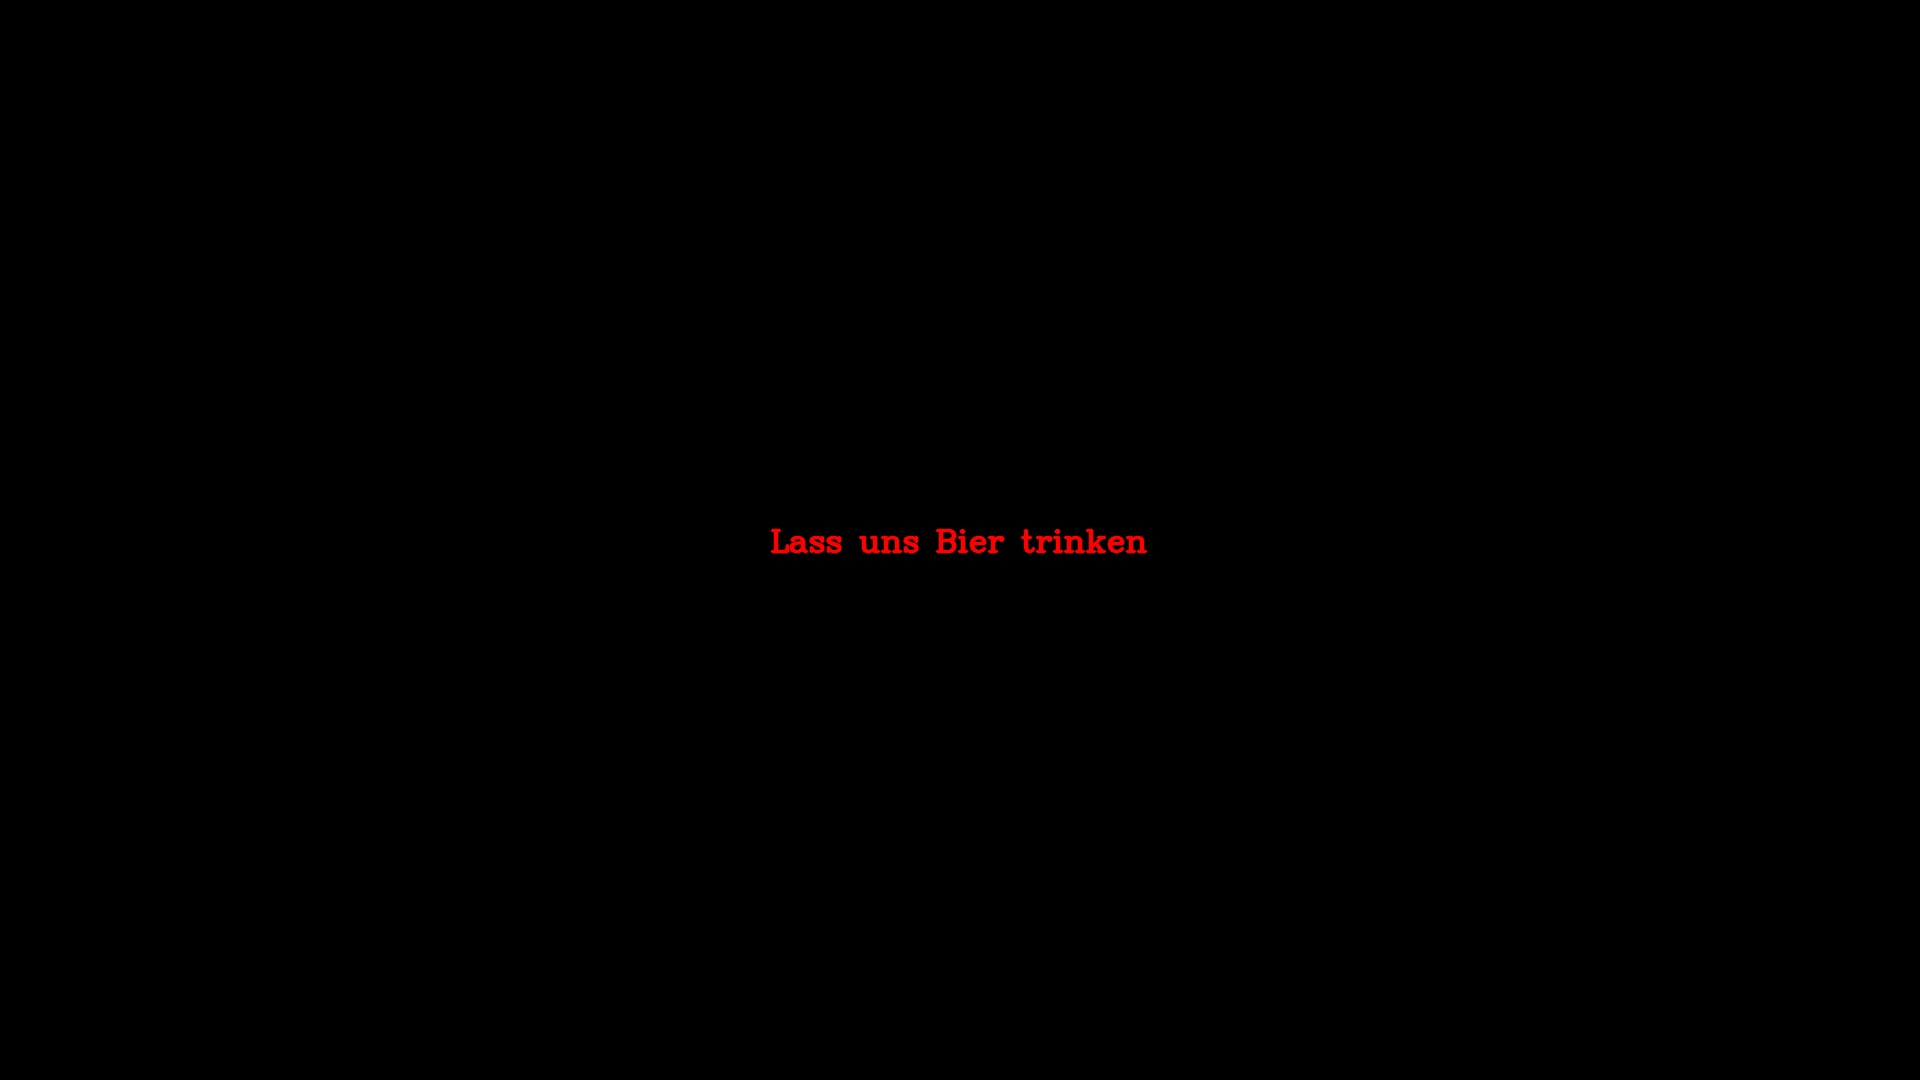

In [57]:
def add_text_to_image(image, text):
    height, width, _ = image.shape

    font = cv2.FONT_HERSHEY_COMPLEX
    font_scale = 1
    font_color = (0, 0, 255)
    thickness = 2
    line_type = cv2.LINE_AA

    text_size = cv2.getTextSize(text, font, font_scale, thickness)[0]

    x = (width - text_size[0]) // 2
    y = height - (height // 2) + (text_size[1] // 2)
    print(x,y)

    cv2.putText(image, text, (x, y), font, font_scale, font_color, thickness, line_type)

    return image


text = 'Lass uns Bier trinken'
result_image = add_text_to_image(create_black_image(), text)
cv2_imshow(result_image)

#### Пункт №3.6

**Примените каждую из этих функций к изображению, созданному в пункте 4.1.**

In [ ]:
text = 'Lass uns Bier trinken'
n_trees = 10
n_snowflakes = 15
n_snowmen = 3

result_image = draw_trees(create_black_image(), n_trees, size_factor=2)

result_image = draw_snowflakes(result_image, n_snowflakes)

result_image = draw_snowmen(result_image, n_snowmen, size_factor=2)

result_image = add_text_to_image(result_image, text)

cv2_imshow(result_image)

---

### **Комплексное задание №4: Работа с данными радиолокационной съемки (SAR)**

#### **Краткая теория:**

Синтетическая апертурная радиолокация (SAR) — это технология, используемая для получения высококачественных радарных изображений земной поверхности. В отличие от традиционных радаров, которые полагаются на передачу и прием радиосигналов, SAR использует активную систему, генерирующую собственные радиосигналы и обрабатывающую их отражения от поверхности для создания изображения.

##### **Принцип работы SAR**

SAR анализирует время отклика радиоволн, отраженных от поверхности Земли. Радиоволны, испускаемые системой, имеют определенные длину волны и частоту. Когда эти волны достигают поверхности, часть из них отражается обратно к радару. Отражения происходят от различных объектов, таких как здания, леса, водные объекты и даже небольшие изменения рельефа.

##### **Каналы SAR**

SAR изображения содержат каналы HH и HV, которые представляют различные комбинации направления падающей и рассеиваемой энергии радиоволн:

- **Канал HH (горизонтально-горизонтальная поляризация)**: Используется для улучшения разрешающей способности и детализации объектов на изображении, особенно для плотных структур и материалов с границами и разделениями.

- **Канал HV (горизонтально-вертикальная поляризация)**: Применяется для выявления изменений в состоянии поверхности, таких как уровень воды в реках, засухи, обледенение и т. д. Он также дополняет информацию канала HH, предоставляя данные о рассеивающих свойствах поверхности.

##### **Комбинация каналов**

Каналы HH и HV могут быть объединены для создания композитных изображений, которые обеспечивают лучшую видимость и возможность анализа объектов и изменений на поверхности Земли. Это позволяет получать полезные данные о структурах, влажности, границах и других характеристиках поверхности.

##### **Применение SAR**

SAR изображения находят применение в различных областях:

- **Геология**: Изучение геологических структур, обнаружение нефтяных и газовых месторождений, оценка движения земной коры.
- **Астрономия**: Исследование поверхности планет и спутников, обнаружение и измерение астероидов и комет.
- **Экология**: Отслеживание изменений в растительности, выявление лесных пожаров, контроль использования земли.
- **Оборона**: Обнаружение и идентификация целей на земле или воде, независимо от условий освещения.

#### **Пункт 4.1. Загрузите изображение и откройте его:**




Ссылка на изображение: https://cloud.mail.ru/public/HEvc/aY7eMhHor

Используя библиотеку tifffile:

In [ ]:
import tifffile as tiff

img = tiff.imread('PATH_TO_IMAGE') # Возвращается также как и в OpenCV массив Numpy,
                                   # далее работаете с методами из OpenCV как обычно

In [ ]:
# Ваш код

#### **Пункт 4.2. Проанализируйте изображение**

Выведите тип изображения:

In [ ]:
# Ваш код

Выведите его размерность:

In [ ]:
# Ваш код

Отобразите отдельно каждый канал, используя метод cv2_imshow():

In [ ]:
# Ваш код

Отобразите отдельно каждый канал, используя matplotlib:

In [ ]:
# Ваш код

Сделайте вывод:


*ВАШ ВЫВОД*

Постройте гистограмму изображения, используя функцию img2hist() из теоретических материалов:

In [ ]:
# Ваш код

#### **Пункт 4.3. Нормализация SAR-изображения**

Перевод в децибелы (dB) может быть полезным для ряда причин при обработке и анализе SAR изображений:

1. Нормализация: Перевод в децибелы может использоваться для нормализации значений яркостей на изображении. Такая нормализация позволяет визуально сравнивать яркости пикселей в разных областях изображения или разных изображениях.

2. Логарифмическая шкала: Децибелы предоставляют логарифмическую шкалу для оценки яркости сигналов. Логарифмическая шкала часто используется для измерения или анализа сигналов, так как она более чувствительна к изменениям в слабых сигналах и может помочь в выявлении слабых расположенных объектов.

3. Снижение динамического диапазона: Одним из преимуществ перевода в децибелы является снижение динамического диапазона значений яркости. Это может быть полезным при обработке и визуализации изображений, так как позволяет лучше выделить детали, особенности и структуры, которые могут быть затеряны в более широком динамическом диапазоне значений.

4. Чувствительность к изменениям: Перевод в децибелы позволяет лучше отслеживать и измерять изменения яркости. Изменения в яркости изображений в децибелах отражают более пропорциональные изменения в амплитуде сигнала, что может быть полезным, например, при обработке временных рядов или отслеживании изменений в рамках одного изображения.

**Переведите изображение в децибелы, используя следующую функцию:**

In [ ]:
def img2dB(image_o, eps=1e-10):
    image = image_o.copy()
    dB = np.where(image > eps, image, -10)
    np.log10(dB, out=dB, where=dB > 0, casting='unsafe')
    return dB

**Напишите функцию img_to_uint(I), которая принимает на вход одномерный массив I и выполняет следующие действия:**

1. Находит минимальное значение (mn) и максимальное значение (mx) в массиве I.
2. Нормализует значения в массиве I, применяя следующую формулу: I = (I - mn) / (mx - mn).
3. Умножает результат на 255.
4. Возвращает массив I, приведенный к типу np.uint8. (Команда: I.astype(np.uint8))

Пример использования функции:



  ```python
  I = np.array([10, 20, 30, 40, 50])
  normalized_I = img_to_uint(I)
  print(normalized_I)
  ```

Результат:
  ```python
  array([0,  63, 127, 191, 255], dtype=uint8)
  ```

In [ ]:
# Ваш код

**Примените эту функцию к переведенному в децибелы изображению:**

In [ ]:
# Ваш код

#### **Пункт 4.4. Повышение контрастности изображения**

*В данном задании следует использовать изображение, полученное на предыдущем этапе (6.3).*

**Разбейте изображение на отдельные каналы:**



```
# Можно сделать так:

Channel_1 = image[:,:,0]
Channel_2 = image[:,:,1]
Channel_3 = image[:,:,2]
```



In [ ]:
# Ваш код

**С помощью методов для выравнивания гистограммы (адаптивного и не адаптивного), подберите оптимальные параметры контрастности отдельно для каждого канала, таким образом чтобы на них было видно как можно больше деталей и не было много шума:**

In [ ]:
# Ваш код

Объедините каналы в одно изображение, в качестве третьего канала используйте целочисленное частное первого и второго каналов, т.е.:



```
Channel_1 = Channel_1
Channel_1 = Channel_2
Channel_3 = int(Channel_1/Channel_2)
```







In [ ]:
# Ваш код

#### **Пункт 4.5. Сегментация изображения по цветовому диапазону**

Напишите функцию, которая принимает на вход **один канал** изображения и количество классов, после чего возвращает сегментированное изображение (маску)



Пример сегментации изображения (до и после):

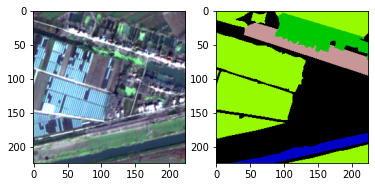

В Вашем случае сегментация происходит по следующим правилам:

1. Предположим, на вход функция получает изображение и число 4
2. Исходный диапазон (0, 255) делится на 4 промежутка: [0, 64), [64, 128), [128,192), [192,255]
3. Пиксели, интенсивность которых соответствует первому промежутку меняют свой цвет на красный, второму на черный, третьему на желтый, четвертому на зеленый (цвет Вы выбираете сами)
4.Получившаяся маска возвращается

Обратите внимание, что функция получает на вход один канал, а возвращать должна цветную маску(!), соответственно, у маски должно быть три канала. (Помним, что изображение это многомерный массив, в котором также можно замещать элементы с помощью перебора или математического аппарата numpy.)

**Сегментируйте первый канал изображения:**

In [ ]:
# Ваш код

**Сегментируйте второй канал изображения:**

In [ ]:
# Ваш код

**Сегментируйте третий канал изображения:**

In [ ]:
# Ваш код

#### **Пункт 4.7. Напишите функцию, которая получает на вход изображение и разделяет его на фрагменты (патчи), размером 256 на 256 пикселей. Функция должна вернуть массив из фрагментов.**








Алгоритм обрезки изображения на равные патчи можно реализовать следующим образом:

1. Получить размеры изображения (ширина и высота).
2. Задать размеры патча (например, ширина и высота патча равная 256 пикселей).
3. Вычислить количество патчей по горизонтали и вертикали, разделив размеры изображения на размеры патча и округлив результаты.
4. Создать пустой массив, в котором будут храниться обрезанные патчи.
5. Проходя по всем патчам, вырезать каждый патч из исходного изображения, используя размеры патча и текущие координаты.
6. Добавить вырезанный патч в массив патчей.
7. Вернуть массив патчей как результат работы алгоритма.

> Пример:
>
> Задание удобно выполнить с помощью срезов.
>
> Поскольку все изображения имеют разный размер, нам необходимо обрезать исходное изображение до ближайшего размера, кратного 256,
>
> Исходная размерность: (1920, 1080, 3)
>
> X = 1920 // 256 = 7 (количество фрагментов по горизонтали)
>
> Y = 1080 // 256 = 4 (количество фрагментов по вертикали)
>
> X = 256 * 7 = 1792
>
> Y = 256 * 4 = 1024
>
> Размерность после обрезки: (1792, 1024, 3)
>
> После этого итеративно проходимся по изображению (можно двумя циклами - по вертикали и по горизонтали) и помещаем в массив обрезанные фрагменты.

**Разделите на патчи изображение:**

In [ ]:
# Ваш код

**Разделите на патчи сегментированную маску:**

In [ ]:
# Ваш код

**После этого сохраните получившиеся массивы в файлы img.npy и mask.npy:**

[Документация Numpy](https://numpy.org/doc/stable/reference/generated/numpy.save.html)



##### **Пример сохранения массива в файл:**



```python
import numpy as np

x = np.arange(10)
print(x)
np.save("outfile.npy", x)
```
```
[0 1 2 3 4 5 6 7 8 9]
```


##### **Пример загрузки массива из файла:**

```python
import numpy as np

x = np.arange(10)
print(x)
np.save("outfile.npy", x)
```
```
[0 1 2 3 4 5 6 7 8 9]
```

In [ ]:
# Ваш код

**Отобразите, используя matplotlib, 10 случайных элементов патчей растра и маски с одинаковыми индексами (должны соответствовать):**

In [ ]:
# Ваш код